In [8]:
import requests 
import pandas as pd 
from datetime import date
from bs4 import BeautifulSoup as bs
from selenium import webdriver 
import time 
import json
import numpy as np
import plotly.express as px 

In [14]:
todays_date=date.today()
current_year=todays_date.year
years=list(range(1990,current_year))

Web scrapping

In [ ]:
init_url="https://www.basketball-reference.com/awards/awards_{}.html"

In [ ]:
# Web scrapping: MPV awards voting stats from 1990 to 2021
for year in years:
    url=init_url.format(year)
    data_yearly_awards=requests.get(url)

    with open("yearly_awards/awards_{}.html".format(year),"w+",encoding="utf-8") as f:
        f.write(data_yearly_awards.text)


In [ ]:
# HTML parsing from downloaded HTML files 
list_dfs=[]
for year in years:
    with open("yearly_awards/awards_{}.html".format(year),encoding="utf-8") as f:
        page=f.read()
    soup=bs(page,"html.parser")
    soup.find("tr", class_="over_header").decompose() #remove the extra header by using decompose() method 
    mvp_table=soup.find(id="mvp")#find the mvp voting table by using global unique id 
    mvp_df=pd.read_html(str(mvp_table))[0] # let panda read html by converting html to string 
    mvp_df['Year']=year
    list_dfs.append(mvp_df)



In [ ]:
index=list(range(0,len(years)))
zipped=list(zip(years,index))
index_dict={year:index for (year,index) in zipped}

In [ ]:
mvp_voting_table=pd.concat(list_dfs) # concat list of dataframes
mvp_voting_table

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Magic Johnson,30,LAL,27.0,636.0,920,0.691,79,37.2,...,6.6,11.5,1.7,0.4,0.480,0.384,0.890,16.5,0.270,1990
1,2,Charles Barkley,26,PHI,38.0,614.0,920,0.667,79,39.1,...,11.5,3.9,1.9,0.6,0.600,0.217,0.749,17.3,0.269,1990
2,3,Michael Jordan,26,CHI,21.0,564.0,920,0.613,82,39.0,...,6.9,6.3,2.8,0.7,0.526,0.376,0.848,19.0,0.285,1990
3,4,Karl Malone,26,UTA,2.0,214.0,920,0.233,82,38.1,...,11.1,2.8,1.5,0.6,0.562,0.372,0.762,15.9,0.245,1990
4,5,Patrick Ewing,27,NYK,1.0,162.0,920,0.176,82,38.6,...,10.9,2.2,1.0,4.0,0.551,0.250,0.775,13.5,0.205,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,11,Russell Westbrook,32,WAS,0.0,5.0,1010,0.005,65,36.4,...,11.5,11.7,1.4,0.4,0.439,0.315,0.656,3.7,0.075,2021
11,12,Ben Simmons,24,PHI,0.0,3.0,1010,0.003,58,32.4,...,7.2,6.9,1.6,0.6,0.557,0.300,0.613,6.0,0.153,2021
12,13T,James Harden,31,TOT,0.0,1.0,1010,0.001,44,36.6,...,7.9,10.8,1.2,0.8,0.466,0.362,0.861,7.0,0.208,2021
13,13T,LeBron James,36,LAL,0.0,1.0,1010,0.001,45,33.4,...,7.7,7.8,1.1,0.6,0.513,0.365,0.698,5.6,0.179,2021


In [ ]:
mvp_voting_table.to_csv("mvp_votings.csv")

In [ ]:
#init Selenium driver to scrap per game statistics 
driver= webdriver.Chrome(executable_path="chromedriver")

In [ ]:
pergame_stats_url="https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"
for year in years:
    url=pergame_stats_url.format(year)
    driver.get(url)
    driver.execute_script("window.scrollTo(1,10000)")
    time.sleep(2)

    html=driver.page_source
    with open("per_game_stats/stats_{}.html".format(year),"w+",encoding="utf-8") as f:
        f.write(html)

In [18]:
list_dfs=[]
for year in years:
    with open("per_game_stats/stats_{}.html".format(year),encoding="utf-8") as f:
        page = f.read()
    
    soup=bs(page,"html.parser")
    soup.find("tr", class_="thead").decompose() #remove the extra header by using decompose() method 
    player_table=soup.find(id="per_game_stats")#find the mvp voting table by using global unique id 
    player_stats_df=pd.read_html(str(player_table))[0] # let panda read html by converting html to string 
    player_stats_df['Year']=year
    list_dfs.append(player_stats_df)

In [19]:
player_per_game_stats=pd.concat(list_dfs)

In [29]:
player_per_game_stats.to_csv("player_per_game_stats.csv")

In [12]:
team_standing="https://www.basketball-reference.com/leagues/NBA_{}_standings.html"

In [21]:
for year in years:
    team_standing_url=team_standing.format(year)

    yearly_team_standing=requests.get(team_standing_url)

    with open("team_standing/standing_{}.html".format(year),"w+",encoding="utf-8") as f:
        f.write(yearly_team_standing.text)


In [22]:
dfs=[]
for year in years:
    with open("team_standing/standing_{}.html".format(year),encoding="utf-8") as f:
        page=f.read()

    soup=bs(page,"html.parser")
    soup.find("tr", class_="thead").decompose() #remove the extra header by using decompose() method 
    team_standing_table=soup.find(id="divs_standings_E")
    team_standing_df=pd.read_html(str(team_standing_table))[0] # let panda read html by converting html to string 
    team_standing_df['Year']=year
    team_standing_df['Team Name']=team_standing_df['Eastern Conference']
    dfs.append(team_standing_df)


    soup=bs(page,"html.parser")
    soup.find("tr", class_="thead").decompose() #remove the extra header by using decompose() method 
    team_standing_table=soup.find(id="divs_standings_W")
    team_standing_df=pd.read_html(str(team_standing_table))[0] # let panda read html by converting html to string 
    team_standing_df['Year']=year
    team_standing_df['Team Name']=team_standing_df['Western Conference']
    dfs.append(team_standing_df)

In [23]:
team_standing_df=pd.concat(dfs)

In [26]:
team_standing_df

,Eastern Conference,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team Name,Western Conference
0,Philadelphia 76ers*,53,29,.646,—,110.2,105.2,4.23,1990,Philadelphia 76ers*,NaN
1,Boston Celtics*,52,30,.634,1.0,110.0,106.0,3.23,1990,Boston Celtics*,NaN
2,New York Knicks*,45,37,.549,8.0,108.3,106.9,0.78,1990,New York Knicks*,NaN
3,Washington Bullets,31,51,.378,22.0,107.7,109.9,-2.43,1990,Washington Bullets,NaN
4,Miami Heat,18,64,.220,35.0,100.6,110.3,-9.59,1990,Miami Heat,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13,NaN,42,30,.583,—,112.4,110.2,2.26,2021,Dallas Mavericks*,Dallas Mavericks*
14,NaN,38,34,.528,4.0,113.3,112.3,1.07,2021,Memphis Grizzlies*,Memphis Grizzlies*
15,NaN,33,39,.458,9.0,111.1,112.8,-1.58,2021,San Antonio Spurs,San Antonio Spurs
16,NaN,31,41,.431,11.0,114.6,114.9,-0.20,2021,New Orleans Pelicans,New Orleans Pelicans


In [27]:
team_standing_df=team_standing_df.drop(['Eastern Conference','Western Conference'],axis=1 )

In [34]:
team_standing_df.loc[team_standing_df['Year']==2021,]

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team Name
0,49,23,.681,—,113.6,108.1,5.28,2021,Philadelphia 76ers*
1,48,24,.667,1.0,118.6,114.1,4.24,2021,Brooklyn Nets*
2,41,31,.569,8.0,107.0,104.7,2.13,2021,New York Knicks*
3,36,36,.500,13.0,112.6,111.2,1.32,2021,Boston Celtics*
4,27,45,.375,22.0,111.3,111.7,-0.54,2021,Toronto Raptors
5,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,2021,Central Division
6,46,26,.639,—,120.1,114.2,5.57,2021,Milwaukee Bucks*
7,34,38,.472,12.0,115.3,115.3,-0.13,2021,Indiana Pacers
8,31,41,.431,15.0,110.7,111.6,-0.94,2021,Chicago Bulls
9,22,50,.306,24.0,103.8,112.3,-8.19,2021,Cleveland Cavaliers


In [35]:
team_standing_df.to_csv("team_standing.csv")

Data preprocessing

Data Cleaning mvp_voting data set 

In [3]:
mvp_votings=pd.read_csv("mvp_votings.csv")
mvp_votings=mvp_votings.drop("Unnamed: 0",axis=1)
mvp_votings

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Magic Johnson,30,LAL,27.0,636.0,920,0.691,79,37.2,...,6.6,11.5,1.7,0.4,0.480,0.384,0.890,16.5,0.270,1990
1,2,Charles Barkley,26,PHI,38.0,614.0,920,0.667,79,39.1,...,11.5,3.9,1.9,0.6,0.600,0.217,0.749,17.3,0.269,1990
2,3,Michael Jordan,26,CHI,21.0,564.0,920,0.613,82,39.0,...,6.9,6.3,2.8,0.7,0.526,0.376,0.848,19.0,0.285,1990
3,4,Karl Malone,26,UTA,2.0,214.0,920,0.233,82,38.1,...,11.1,2.8,1.5,0.6,0.562,0.372,0.762,15.9,0.245,1990
4,5,Patrick Ewing,27,NYK,1.0,162.0,920,0.176,82,38.6,...,10.9,2.2,1.0,4.0,0.551,0.250,0.775,13.5,0.205,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,11,Russell Westbrook,32,WAS,0.0,5.0,1010,0.005,65,36.4,...,11.5,11.7,1.4,0.4,0.439,0.315,0.656,3.7,0.075,2021
484,12,Ben Simmons,24,PHI,0.0,3.0,1010,0.003,58,32.4,...,7.2,6.9,1.6,0.6,0.557,0.300,0.613,6.0,0.153,2021
485,13T,James Harden,31,TOT,0.0,1.0,1010,0.001,44,36.6,...,7.9,10.8,1.2,0.8,0.466,0.362,0.861,7.0,0.208,2021
486,13T,LeBron James,36,LAL,0.0,1.0,1010,0.001,45,33.4,...,7.7,7.8,1.1,0.6,0.513,0.365,0.698,5.6,0.179,2021


In [18]:
mvp_votings.columns

Index(['Rank', 'Player', 'Age', 'Tm', 'First', 'Pts Won', 'Pts Max', 'Share',
       'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS',
       'WS/48', 'Year'],
      dtype='object')

To get the player who actually won the MVP awards across 20 years

In [4]:
mvp_winner=mvp_votings.loc[mvp_votings['Rank']=="1",]
mvp_winner

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Magic Johnson,30,LAL,27.0,636.0,920,0.691,79,37.2,...,6.6,11.5,1.7,0.4,0.480,0.384,0.890,16.5,0.270,1990
14,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,37.0,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
34,1,Michael Jordan,28,CHI,80.0,900.0,960,0.938,80,38.8,...,6.4,6.1,2.3,0.9,0.519,0.270,0.832,17.7,0.274,1992
51,1,Charles Barkley,29,PHO,59.0,835.0,980,0.852,76,37.6,...,12.2,5.1,1.6,1.0,0.520,0.305,0.765,14.4,0.242,1993
65,1,Hakeem Olajuwon,31,HOU,66.0,889.0,1010,0.880,80,41.0,...,11.9,3.6,1.6,3.7,0.528,0.421,0.716,14.3,0.210,1994
82,1,David Robinson,29,SAS,73.0,901.0,1050,0.858,81,38.0,...,10.8,2.9,1.7,3.2,0.530,0.300,0.774,17.5,0.273,1995
97,1,Michael Jordan,32,CHI,109.0,1114.0,1130,0.986,82,37.7,...,6.6,4.3,2.2,0.5,0.495,0.427,0.834,20.4,0.317,1996
114,1,Karl Malone,33,UTA,63.0,986.0,1150,0.857,82,36.6,...,9.9,4.5,1.4,0.6,0.550,0.000,0.755,16.7,0.268,1997
134,1,Michael Jordan,34,CHI,92.0,1084.0,1160,0.934,82,38.8,...,5.8,3.5,1.7,0.5,0.465,0.238,0.784,15.8,0.238,1998
153,1,Karl Malone,35,UTA,44.0,827.0,1180,0.701,49,37.4,...,9.4,4.1,1.3,0.6,0.493,0.000,0.788,9.6,0.252,1999


<AxesSubplot:ylabel='Frequency'>

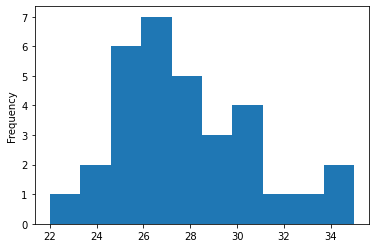

In [7]:
mvp_winner['Age'].plot(kind='hist')

In [15]:
mvp_winner['Age'].value_counts()

25    6
27    5
28    5
29    3
30    2
31    2
26    2
24    2
32    1
33    1
34    1
35    1
22    1
Name: Age, dtype: int64

In [52]:
fig=px.histogram(mvp_winner,x='Age',width=800,title='Age distribution of MVP winner')
fig.show()

In [53]:
fig = px.line(mvp_winner, x="Year", y="PTS", title='Per game points in MVP winner',markers=True,width=800)
fig.show()

In [45]:
mvp_winner[mvp_winner['PTS']==15.5].iloc[0]

Rank                1
Player     Steve Nash
Age                30
Tm                PHO
First            65.0
Pts Won        1066.0
Pts Max          1270
Share           0.839
G                  75
MP               34.3
PTS              15.5
TRB               3.3
AST              11.5
STL               1.0
BLK               0.1
FG%             0.502
3P%             0.431
FT%             0.887
WS               10.9
WS/48           0.203
Year             2005
Name: 254, dtype: object

In [49]:
mvp_winner.loc[(mvp_winner['FG%']+mvp_winner['3P%']+mvp_winner['FT%'])>=1.8,]

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
254,1,Steve Nash,30,PHO,65.0,1066.0,1270,0.839,75,34.3,...,3.3,11.5,1.0,0.1,0.502,0.431,0.887,10.9,0.203,2005
270,1,Steve Nash,31,PHO,57.0,924.0,1250,0.739,79,35.4,...,4.2,10.5,0.8,0.2,0.512,0.439,0.921,12.4,0.212,2006
281,1,Dirk Nowitzki,28,DAL,83.0,1138.0,1290,0.882,78,36.2,...,8.9,3.4,0.7,0.8,0.502,0.416,0.904,16.3,0.278,2007
403,1,Stephen Curry,26,GSW,100.0,1198.0,1300,0.922,80,32.7,...,4.3,7.7,2.0,0.2,0.487,0.443,0.914,15.7,0.288,2015
415,1,Stephen Curry,27,GSW,131.0,1310.0,1310,1.000,79,34.2,...,5.4,6.7,2.1,0.2,0.504,0.454,0.908,17.9,0.318,2016
473,1,Nikola Jokić,25,DEN,91.0,971.0,1010,0.961,72,34.6,...,10.8,8.3,1.3,0.7,0.566,0.388,0.868,15.6,0.301,2021


In [59]:
fig = px.line(mvp_winner, x="Year", y=['FG%','3P%','FT%'], title='FG&3P&FT performance in MVP winner',markers=True,width=800)
fig.show()

In [7]:
mvp_votings.loc[mvp_votings['Share'].idxmax()]

Rank                   1
Player     Stephen Curry
Age                   27
Tm                   GSW
First              131.0
Pts Won           1310.0
Pts Max             1310
Share                1.0
G                     79
MP                  34.2
PTS                 30.1
TRB                  5.4
AST                  6.7
STL                  2.1
BLK                  0.2
FG%                0.504
3P%                0.454
FT%                0.908
WS                  17.9
WS/48              0.318
Year                2016
Name: 415, dtype: object

In [57]:
fig = px.line(mvp_winner, x="Year", y="Share", title='MVP share in MVP winner',markers=True,width=800)
fig.show()

In [8]:
mvp_votings.columns

Index(['Rank', 'Player', 'Age', 'Tm', 'First', 'Pts Won', 'Pts Max', 'Share',
       'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS',
       'WS/48', 'Year'],
      dtype='object')

mvp_voting : Only select columns which useful for prediction model

In [37]:
mvp_votings=mvp_votings[['Player','Year','Pts Won','Pts Max','Share']]

In [38]:
mvp_votings

,Player,Year,Pts Won,Pts Max,Share
0,Magic Johnson,1990,636.0,920,0.691
1,Charles Barkley,1990,614.0,920,0.667
2,Michael Jordan,1990,564.0,920,0.613
3,Karl Malone,1990,214.0,920,0.233
4,Patrick Ewing,1990,162.0,920,0.176
...,...,...,...,...,...
483,Russell Westbrook,2021,5.0,1010,0.005
484,Ben Simmons,2021,3.0,1010,0.003
485,James Harden,2021,1.0,1010,0.001
486,LeBron James,2021,1.0,1010,0.001


Player per game statistics 

In [60]:
player_per_game_stats=pd.read_csv("player_per_game_stats.csv")
player_per_game_stats=player_per_game_stats.drop(["Unnamed: 0",'Rk'],axis=1)
player_per_game_stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Mark Acres,C,27,ORL,80,50,21.1,1.7,3.6,.484,...,1.9,3.5,5.4,0.8,0.5,0.3,0.9,3.1,4.5,1990
1,Michael Adams,PG,27,DEN,79,74,34.1,5.0,12.5,.402,...,0.6,2.2,2.8,6.3,1.5,0.0,1.8,1.7,15.5,1990
2,Mark Aguirre,SF,30,DET,78,40,25.7,5.6,11.5,.488,...,1.5,2.4,3.9,1.9,0.4,0.2,1.6,2.6,14.1,1990
3,Danny Ainge,PG,30,SAC,75,68,36.4,6.7,15.4,.438,...,0.9,3.4,4.3,6.0,1.5,0.2,2.5,3.2,17.9,1990
4,Mark Alarie,PF,26,WSB,82,10,23.1,4.5,9.6,.473,...,1.8,2.7,4.6,1.7,0.7,0.5,1.2,2.7,10.5,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18516,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,.462,...,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,2021
18517,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,.559,...,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,2021
18518,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,.438,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
18519,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,.559,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


Player per game statistics: Number of players who have played in the league from 1990 to 2021

In [61]:
player_per_game_stats['Player'].nunique()

2734

Player per game statistics : Kobe Bryant not in the dataset, which is explictly saying something wrong in the data 

In [62]:
player_per_game_stats[player_per_game_stats['Player']=="Kobe Bryant"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year


Player per game statistics: Have a * behind 

In [67]:
kb=player_per_game_stats[player_per_game_stats['Player'].str.contains("Kobe Bryant")]

In [73]:
kb=kb.iloc[0:5,0:4]

In [74]:
print(kb.to_markdown())

|      | Player       | Pos   |   Age | Tm   |
|-----:|:-------------|:------|------:|:-----|
| 3477 | Kobe Bryant* | SF    |    18 | LAL  |
| 4076 | Kobe Bryant* | SF    |    19 | LAL  |
| 4637 | Kobe Bryant* | SG    |    20 | LAL  |
| 5172 | Kobe Bryant* | SG    |    21 | LAL  |
| 5682 | Kobe Bryant* | SG    |    22 | LAL  |


Player per game statistics : Not only Kobe,the star is behind  Charles Barkley*,Larry Bird*	.

In [43]:
player_per_game_stats.loc[player_per_game_stats["Year"]==1991].head(50)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
477,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,.474,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
478,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,.413,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
479,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,.509,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
480,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,.394,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
481,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,.462,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
482,Danny Ainge,SG,31,POR,80,0,21.4,4.2,8.9,.472,...,0.6,2.0,2.6,3.6,0.8,0.2,1.3,2.4,11.1,1991
483,Mark Alarie,PF,27,WSB,42,1,14.0,2.4,5.4,.440,...,1.0,1.8,2.8,1.1,0.4,0.2,1.0,2.1,5.8,1991
484,Steve Alford,PG,26,DAL,34,0,6.9,1.7,3.4,.504,...,0.3,0.4,0.7,0.6,0.2,0.0,0.5,0.3,4.4,1991
485,Greg Anderson,PF,26,TOT,68,2,13.6,1.7,4.0,.430,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
486,Greg Anderson,PF,26,MIL,26,0,9.5,1.0,2.8,.370,...,1.0,1.9,2.9,0.1,0.3,0.3,0.8,1.1,2.7,1991


Player per game statistics: Why there is a star behind player's name?

In [44]:
player_per_game_stats['haveStar'] = player_per_game_stats['Player'].str.contains("*",regex=False)

Player per game statistics : One possible answer is the dataset mark a star behind the player's name if the player is a member of Hall of Fame 

In [45]:
player_per_game_stats.loc[(player_per_game_stats['haveStar']==True) & (player_per_game_stats['Year']==2000)].head(50)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,haveStar
5109,Ray Allen*,SG,24,MIL,82,82,37.4,7.8,17.2,.455,...,3.4,4.4,3.8,1.3,0.2,2.2,2.3,22.1,2000,True
5127,Charles Barkley*,PF,36,HOU,20,18,31.0,5.3,11.1,.477,...,6.9,10.5,3.2,0.7,0.2,2.2,2.4,14.5,2000,True
5172,Kobe Bryant*,SG,21,LAL,66,62,38.2,8.4,17.9,.468,...,4.7,6.3,4.9,1.6,0.9,2.8,3.3,22.5,2000,True
5240,Vlade Divac*,C,31,SAC,82,81,29.0,4.7,9.3,.503,...,5.9,8.0,3.0,1.3,1.3,2.3,3.1,12.3,2000,True
5245,Tim Duncan*,PF,23,SAS,74,74,38.9,8.5,17.3,.490,...,8.9,12.4,3.2,0.9,2.2,3.3,2.8,23.2,2000,True
5257,Patrick Ewing*,C,37,NYK,62,62,32.8,5.8,12.5,.466,...,7.5,9.7,0.9,0.6,1.4,2.3,3.2,15.0,2000,True
5271,Kevin Garnett*,PF,23,MIN,81,81,40.0,9.4,18.8,.497,...,9.0,11.8,5.0,1.5,1.6,3.3,2.5,22.9,2000,True
5297,Tim Hardaway*,PG,33,MIA,52,52,32.2,4.7,12.3,.386,...,2.4,2.9,7.4,0.9,0.1,2.3,2.2,13.4,2000,True
5312,Grant Hill*,SF,27,DET,74,74,37.5,9.4,19.2,.489,...,5.3,6.6,5.2,1.4,0.6,3.2,2.6,25.8,2000,True
5327,Allen Iverson*,SG,24,PHI,70,70,40.8,10.4,24.8,.421,...,2.8,3.8,4.7,2.1,0.1,3.3,2.3,28.4,2000,True


In [46]:
del player_per_game_stats['haveStar']

In [47]:
player_per_game_stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Mark Acres,C,27,ORL,80,50,21.1,1.7,3.6,.484,...,1.9,3.5,5.4,0.8,0.5,0.3,0.9,3.1,4.5,1990
1,Michael Adams,PG,27,DEN,79,74,34.1,5.0,12.5,.402,...,0.6,2.2,2.8,6.3,1.5,0.0,1.8,1.7,15.5,1990
2,Mark Aguirre,SF,30,DET,78,40,25.7,5.6,11.5,.488,...,1.5,2.4,3.9,1.9,0.4,0.2,1.6,2.6,14.1,1990
3,Danny Ainge,PG,30,SAC,75,68,36.4,6.7,15.4,.438,...,0.9,3.4,4.3,6.0,1.5,0.2,2.5,3.2,17.9,1990
4,Mark Alarie,PF,26,WSB,82,10,23.1,4.5,9.6,.473,...,1.8,2.7,4.6,1.7,0.7,0.5,1.2,2.7,10.5,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18516,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,.462,...,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,2021
18517,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,.559,...,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,2021
18518,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,.438,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
18519,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,.559,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


Player per game statistics : Remove the star 

In [48]:
player_per_game_stats['Player']=player_per_game_stats['Player'].str.replace("*","",regex=False)

In [49]:
player_per_game_stats[player_per_game_stats['Player']=="Kobe Bryant"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
3477,Kobe Bryant,SF,18,LAL,71,6,15.5,2.5,5.9,.417,...,0.7,1.2,1.9,1.3,0.7,0.3,1.6,1.4,7.6,1997
4076,Kobe Bryant,SF,19,LAL,79,1,26.0,4.9,11.6,.428,...,1.0,2.1,3.1,2.5,0.9,0.5,2.0,2.3,15.4,1998
4637,Kobe Bryant,SG,20,LAL,50,50,37.9,7.2,15.6,.465,...,1.1,4.2,5.3,3.8,1.4,1.0,3.1,3.1,19.9,1999
5172,Kobe Bryant,SG,21,LAL,66,62,38.2,8.4,17.9,.468,...,1.6,4.7,6.3,4.9,1.6,0.9,2.8,3.3,22.5,2000
5682,Kobe Bryant,SG,22,LAL,68,68,40.9,10.3,22.2,.464,...,1.5,4.3,5.9,5.0,1.7,0.6,3.2,3.3,28.5,2001
6253,Kobe Bryant,SG,23,LAL,80,80,38.3,9.4,20.0,.469,...,1.4,4.1,5.5,5.5,1.5,0.4,2.8,2.9,25.2,2002
6763,Kobe Bryant,SG,24,LAL,82,82,41.5,10.6,23.5,.451,...,1.3,5.6,6.9,5.9,2.2,0.8,3.5,2.7,30.0,2003
7289,Kobe Bryant,SG,25,LAL,65,64,37.6,7.9,18.1,.438,...,1.6,3.9,5.5,5.1,1.7,0.4,2.6,2.7,24.0,2004
7892,Kobe Bryant,SG,26,LAL,66,66,40.7,8.7,20.1,.433,...,1.4,4.5,5.9,6.0,1.3,0.8,4.1,2.6,27.6,2005
8495,Kobe Bryant,SG,27,LAL,80,80,41.0,12.2,27.2,.450,...,0.9,4.4,5.3,4.5,1.8,0.4,3.1,2.9,35.4,2006


Same player occurs more than one time in the same year data, this may because this player get traded to various teams in the same year . For example, Uwe Blab occurse three time in the Year 1990 data, and he got traded to 2 different teams in this season which are GSW(Golden State Warrior) and SAS(Spurs), but the TOT(not a valid team name in league) may refers to the statistics he play in both teams. After googling, the term TOT in NBA terminology is meant "Two Other Teams", meaning that player played for tow or more teams in that season.This also can be known from the number of Game he played in this year. 

Problems : One player has to be played for one team in the same year, we could take the total statistics which Tm is TOT

In [75]:
player_per_game_stats.head(50)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Mark Acres,C,27,ORL,80,50,21.1,1.7,3.6,.484,...,1.9,3.5,5.4,0.8,0.5,0.3,0.9,3.1,4.5,1990
1,Michael Adams,PG,27,DEN,79,74,34.1,5.0,12.5,.402,...,0.6,2.2,2.8,6.3,1.5,0.0,1.8,1.7,15.5,1990
2,Mark Aguirre,SF,30,DET,78,40,25.7,5.6,11.5,.488,...,1.5,2.4,3.9,1.9,0.4,0.2,1.6,2.6,14.1,1990
3,Danny Ainge,PG,30,SAC,75,68,36.4,6.7,15.4,.438,...,0.9,3.4,4.3,6.0,1.5,0.2,2.5,3.2,17.9,1990
4,Mark Alarie,PF,26,WSB,82,10,23.1,4.5,9.6,.473,...,1.8,2.7,4.6,1.7,0.7,0.5,1.2,2.7,10.5,1990
5,Steve Alford,PG,25,DAL,41,0,7.4,1.5,3.4,.457,...,0.0,0.6,0.6,1.0,0.4,0.1,0.4,0.5,4.1,1990
6,Randy Allen,SG,25,SAC,63,6,11.8,1.7,3.8,.444,...,0.8,1.4,2.2,0.4,0.3,0.3,0.4,1.6,3.7,1990
7,Greg Anderson,PF,25,MIL,60,28,21.5,3.7,7.2,.507,...,1.9,4.4,6.2,0.4,0.5,0.9,1.3,2.9,8.8,1990
8,Nick Anderson,SG,22,ORL,81,9,22.0,4.6,9.3,.494,...,1.3,2.6,3.9,1.5,0.9,0.4,1.7,1.7,11.5,1990
9,Richard Anderson,PF,29,CHH,54,2,11.2,1.6,3.9,.417,...,0.6,1.7,2.4,1.0,0.4,0.2,0.5,1.2,4.3,1990


In [80]:
player = player_per_game_stats.groupby(['Player',"Year"]).get_group(('Uwe Blab',1990))
player=player.iloc[0:5,0:4]

In [81]:
print(player.to_markdown())

|    | Player   | Pos   |   Age | Tm   |
|---:|:---------|:------|------:|:-----|
| 25 | Uwe Blab | C     |    27 | TOT  |
| 26 | Uwe Blab | C     |    27 | GSW  |
| 27 | Uwe Blab | C     |    27 | SAS  |


In [52]:
def one_team_per_year(dataframe):
    if dataframe.shape[0]==1:
        return dataframe 
    else:
        row =dataframe[dataframe['Tm']=='TOT']
        row['Tm']=dataframe.iloc[-1,]['Tm']
        return row 

player_stats = player_per_game_stats.groupby(['Player',"Year"]).apply(one_team_per_year)  #after groupby, apply function to each group 

In [53]:
player_stats

Player Pos Age   Tm   G  GS    MP   FG  \
Player         Year                                                        
A.C. Green     1990 146       A.C. Green  PF  26  LAL  82  82  33.0  4.7   
               1991 641       A.C. Green  PF  27  LAL  82  21  26.4  3.1   
               1992 1110      A.C. Green  PF  28  LAL  82  53  35.4  4.7   
               1993 1569      A.C. Green  PF  29  LAL  82  55  34.4  4.6   
               1994 2056      A.C. Green  PF  30  PHO  82  55  34.5  5.7   
...                                  ...  ..  ..  ...  ..  ..   ...  ...   
Željko Rebrača 2002 6572  Željko Rebrača   C  29  DET  74   4  15.9  2.6   
               2003 7072  Željko Rebrača   C  30  DET  30  12  16.3  2.7   
               2004 7653  Željko Rebrača   C  31  ATL  24   2  11.4  1.4   
               2005 8253  Željko Rebrača   C  32  LAC  58   2  16.0  2.3   
               2006 8847  Željko Rebrača   C  33  LAC  29   2  14.2  1.8   

                           FGA   FG%  ...  ORB  DRB  TRB  AST  STL  BLK  TOV  \
Player         Year                   ...                                      
A.C. Green     1990 146    9.8  .478  ...  3.2  5.5  8.7  1.1  0.8  0.6  1.4   
               1991 641    6.6  .476  ...  2.5  3.8  6.3  0.9  0.7  0.3  1.2   
               1992 1110   9.8  .476  ...  3.7  5.6  9.3  1.4  1.1  0.4  1.4   
               1993 1569   8.6  .537  ...  3.5  5.2  8.7  1.4  1.1  0.5  1.4   
               1994 2056  11.3  .502  ...  3.4  5.8  9.2  1.7  0.9  0.5  1.2   
...                        ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   
Željko Rebrača 2002 6572   5.1  .505  ...  1.1  2.8  3.9  0.5  0.4  1.0  1.1   
               2003 7072   4.8  .552  ...  0.9  2.2  3.1  0.3  0.2  0.6  1.0   
               2004 7653   3.2  .442  ...  1.0  1.5  2.4  0.3  0.2  0.5  0.7   
               2005 8253   4.0  .568  ...  0.8  2.3  3.2  0.4  0.2  0.7  0.8   
               2006 8847   3.3  .542  ...  0.4  1.8  2.2  0.3  0.2  0.7  0.8   

                           PF   PTS  Year  
Player         Year                        
A.C. Green     1990 146   2.5  12.9  1990  
               1991 641   1.4   9.1  1991  
               1992 1110  1.7  13.6  1992  
               1993 1569  1.8  12.8  1993  
               1994 2056  1.7  14.7  1994  
...                       ...   ...   ...  
Željko Rebrača 2002 6572  2.6   6.9  2002  
               2003 7072  2.6   6.6  2003  
               2004 7653  2.2   3.8  2004  
               2005 8253  2.2   5.8  2005  
               2006 8847  2.0   4.7  2006  

[14471 rows x 30 columns]

In [54]:
player_stats.index=player_stats.index.droplevel()

In [55]:
player_stats.index=player_stats.index.droplevel()

In [56]:
player_stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
146,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,.478,...,3.2,5.5,8.7,1.1,0.8,0.6,1.4,2.5,12.9,1990
641,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,2.5,3.8,6.3,0.9,0.7,0.3,1.2,1.4,9.1,1991
1110,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,3.7,5.6,9.3,1.4,1.1,0.4,1.4,1.7,13.6,1992
1569,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,3.5,5.2,8.7,1.4,1.1,0.5,1.4,1.8,12.8,1993
2056,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,3.4,5.8,9.2,1.7,0.9,0.5,1.2,1.7,14.7,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6572,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002
7072,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003
7653,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,1.0,1.5,2.4,0.3,0.2,0.5,0.7,2.2,3.8,2004
8253,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.8,2.3,3.2,0.4,0.2,0.7,0.8,2.2,5.8,2005


In [63]:
combined_player_mvp=player_stats.merge(mvp_votings,how='outer',on=['Player',"Year"])

In [64]:
combined_player_mvp

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,.478,...,1.1,0.8,0.6,1.4,2.5,12.9,1990,NaN,NaN,NaN
1,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,NaN,NaN,NaN
2,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,NaN,NaN,NaN
3,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,NaN,NaN,NaN
4,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14466,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,NaN,NaN,NaN
14467,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,NaN,NaN,NaN
14468,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,NaN,NaN,NaN
14469,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,NaN,NaN,NaN


In [65]:
mvp_yearly_max_votes=mvp_votings[['Year','Pts Max']].drop_duplicates().set_index("Year")

In [66]:
dic=mvp_yearly_max_votes.to_dict(orient="index")
dic

{1990: {'Pts Max': 920},
 1991: {'Pts Max': 960},
 1992: {'Pts Max': 960},
 1993: {'Pts Max': 980},
 1994: {'Pts Max': 1010},
 1995: {'Pts Max': 1050},
 1996: {'Pts Max': 1130},
 1997: {'Pts Max': 1150},
 1998: {'Pts Max': 1160},
 1999: {'Pts Max': 1180},
 2000: {'Pts Max': 1210},
 2001: {'Pts Max': 1240},
 2002: {'Pts Max': 1260},
 2003: {'Pts Max': 1190},
 2004: {'Pts Max': 1230},
 2005: {'Pts Max': 1270},
 2006: {'Pts Max': 1250},
 2007: {'Pts Max': 1290},
 2008: {'Pts Max': 1260},
 2009: {'Pts Max': 1210},
 2010: {'Pts Max': 1230},
 2011: {'Pts Max': 1210},
 2012: {'Pts Max': 1210},
 2013: {'Pts Max': 1210},
 2014: {'Pts Max': 1250},
 2015: {'Pts Max': 1300},
 2016: {'Pts Max': 1310},
 2017: {'Pts Max': 1010},
 2018: {'Pts Max': 1010},
 2019: {'Pts Max': 1010},
 2020: {'Pts Max': 1010},
 2021: {'Pts Max': 1010}}

In [67]:
dic[1990]

{'Pts Max': 920}

In [68]:
combined_player_mvp[combined_player_mvp['Player']=='Stephen Curry']

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
12654,Stephen Curry,PG,21,GSW,80,77,36.2,6.6,14.3,.462,...,5.9,1.9,0.2,3.0,3.2,17.5,2010,NaN,NaN,NaN
12655,Stephen Curry,PG,22,GSW,74,74,33.6,6.8,14.2,.480,...,5.8,1.5,0.3,3.1,3.1,18.6,2011,NaN,NaN,NaN
12656,Stephen Curry,PG,23,GSW,26,23,28.2,5.6,11.4,.490,...,5.3,1.5,0.3,2.5,2.4,14.7,2012,NaN,NaN,NaN
12657,Stephen Curry,PG,24,GSW,78,78,38.2,8.0,17.8,.451,...,6.9,1.6,0.2,3.1,2.5,22.9,2013,3.0,1210.0,0.002
12658,Stephen Curry,PG,25,GSW,78,78,36.5,8.4,17.7,.471,...,8.5,1.6,0.2,3.8,2.5,24.0,2014,66.0,1250.0,0.053
12659,Stephen Curry,PG,26,GSW,80,80,32.7,8.2,16.8,.487,...,7.7,2.0,0.2,3.1,2.0,23.8,2015,1198.0,1300.0,0.922
12660,Stephen Curry,PG,27,GSW,79,79,34.2,10.2,20.2,.504,...,6.7,2.1,0.2,3.3,2.0,30.1,2016,1310.0,1310.0,1.000
12661,Stephen Curry,PG,28,GSW,79,79,33.4,8.5,18.3,.468,...,6.6,1.8,0.2,3.0,2.3,25.3,2017,52.0,1010.0,0.051
12662,Stephen Curry,PG,29,GSW,51,51,32.0,8.4,16.9,.495,...,6.1,1.6,0.2,3.0,2.2,26.4,2018,5.0,1010.0,0.005
12663,Stephen Curry,PG,30,GSW,69,69,33.8,9.2,19.4,.472,...,5.2,1.3,0.4,2.8,2.4,27.3,2019,175.0,1010.0,0.173


In [69]:
for index in combined_player_mvp.index:
    combined_player_mvp['Pts Max'][index]= dic[combined_player_mvp['Year'][index]]['Pts Max']

C:\Users\SiYu\AppData\Local\Temp\ipykernel_15296\1728185484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_player_mvp['Pts Max'][index]= dic[combined_player_mvp['Year'][index]]['Pts Max']


In [70]:
combined_player_mvp

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,.478,...,1.1,0.8,0.6,1.4,2.5,12.9,1990,NaN,920.0,NaN
1,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,NaN,960.0,NaN
2,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,NaN,960.0,NaN
3,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,NaN,980.0,NaN
4,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,NaN,1010.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14466,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,NaN,1260.0,NaN
14467,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,NaN,1190.0,NaN
14468,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,NaN,1230.0,NaN
14469,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,NaN,1270.0,NaN


In [41]:
combined_player_mvp[combined_player_mvp['Player']=='Stephen Curry']

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
12654,Stephen Curry,PG,21,GSW,80,77,36.2,6.6,14.3,.462,...,5.9,1.9,0.2,3.0,3.2,17.5,2010,NaN,1230.0,NaN
12655,Stephen Curry,PG,22,GSW,74,74,33.6,6.8,14.2,.480,...,5.8,1.5,0.3,3.1,3.1,18.6,2011,NaN,1210.0,NaN
12656,Stephen Curry,PG,23,GSW,26,23,28.2,5.6,11.4,.490,...,5.3,1.5,0.3,2.5,2.4,14.7,2012,NaN,1210.0,NaN
12657,Stephen Curry,PG,24,GSW,78,78,38.2,8.0,17.8,.451,...,6.9,1.6,0.2,3.1,2.5,22.9,2013,3.0,1210.0,0.002
12658,Stephen Curry,PG,25,GSW,78,78,36.5,8.4,17.7,.471,...,8.5,1.6,0.2,3.8,2.5,24.0,2014,66.0,1250.0,0.053
12659,Stephen Curry,PG,26,GSW,80,80,32.7,8.2,16.8,.487,...,7.7,2.0,0.2,3.1,2.0,23.8,2015,1198.0,1300.0,0.922
12660,Stephen Curry,PG,27,GSW,79,79,34.2,10.2,20.2,.504,...,6.7,2.1,0.2,3.3,2.0,30.1,2016,1310.0,1310.0,1.000
12661,Stephen Curry,PG,28,GSW,79,79,33.4,8.5,18.3,.468,...,6.6,1.8,0.2,3.0,2.3,25.3,2017,52.0,1010.0,0.051
12662,Stephen Curry,PG,29,GSW,51,51,32.0,8.4,16.9,.495,...,6.1,1.6,0.2,3.0,2.2,26.4,2018,5.0,1010.0,0.005
12663,Stephen Curry,PG,30,GSW,69,69,33.8,9.2,19.4,.472,...,5.2,1.3,0.4,2.8,2.4,27.3,2019,175.0,1010.0,0.173


In [42]:
combined_player_mvp[['Pts Won','Share']]=combined_player_mvp[['Pts Won','Share']].fillna(0)

In [43]:
combined_player_mvp

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,.478,...,1.1,0.8,0.6,1.4,2.5,12.9,1990,0.0,920.0,0.0
1,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,0.0,960.0,0.0
2,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,0.0,960.0,0.0
3,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,0.0,980.0,0.0
4,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,0.0,1010.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14466,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,0.0,1260.0,0.0
14467,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,0.0,1190.0,0.0
14468,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,0.0,1230.0,0.0
14469,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,0.0,1270.0,0.0


In [44]:
combined_player_mvp.to_csv("Player_Per_Game_MVP_Score.csv")

In [45]:
combined_player_mvp=pd.read_csv("Player_Per_Game_MVP_Score.csv",index_col=[0])

In [46]:
combined_player_mvp

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,0.478,...,1.1,0.8,0.6,1.4,2.5,12.9,1990,0.0,920.0,0.0
1,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,0.0,960.0,0.0
2,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,0.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,0.0,960.0,0.0
3,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,0.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,0.0,980.0,0.0
4,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,0.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,0.0,1010.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14466,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,0.505,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,0.0,1260.0,0.0
14467,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,0.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,0.0,1190.0,0.0
14468,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,0.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,0.0,1230.0,0.0
14469,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,0.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,0.0,1270.0,0.0


In [83]:
team_standing=pd.read_csv("team_standing.csv",index_col=[0])
team_standing.head(30) 

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team Name
0,53,29,.646,—,110.2,105.2,4.23,1990,Philadelphia 76ers*
1,52,30,.634,1.0,110.0,106.0,3.23,1990,Boston Celtics*
2,45,37,.549,8.0,108.3,106.9,0.78,1990,New York Knicks*
3,31,51,.378,22.0,107.7,109.9,-2.43,1990,Washington Bullets
4,18,64,.220,35.0,100.6,110.3,-9.59,1990,Miami Heat
5,17,65,.207,36.0,100.1,108.0,-7.82,1990,New Jersey Nets
6,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1990,Central Division
7,59,23,.720,—,104.3,98.3,5.41,1990,Detroit Pistons*
8,55,27,.671,4.0,109.5,106.2,2.74,1990,Chicago Bulls*
9,44,38,.537,15.0,106.0,106.8,-1.06,1990,Milwaukee Bucks*


In [84]:
team_standing= team_standing[~team_standing['W'].str.contains('Division')]

In [85]:
team_standing.head(30)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team Name
0,53,29,.646,—,110.2,105.2,4.23,1990,Philadelphia 76ers*
1,52,30,.634,1.0,110.0,106.0,3.23,1990,Boston Celtics*
2,45,37,.549,8.0,108.3,106.9,0.78,1990,New York Knicks*
3,31,51,.378,22.0,107.7,109.9,-2.43,1990,Washington Bullets
4,18,64,.220,35.0,100.6,110.3,-9.59,1990,Miami Heat
5,17,65,.207,36.0,100.1,108.0,-7.82,1990,New Jersey Nets
7,59,23,.720,—,104.3,98.3,5.41,1990,Detroit Pistons*
8,55,27,.671,4.0,109.5,106.2,2.74,1990,Chicago Bulls*
9,44,38,.537,15.0,106.0,106.8,-1.06,1990,Milwaukee Bucks*
10,42,40,.512,17.0,102.6,102.9,-0.62,1990,Cleveland Cavaliers*


In [89]:
team_standing_md=team_standing.iloc[0:5,0:5]
print(team_standing_md.to_markdown())

|    |   W |   L |   W/L% | GB   |   PS/G |
|---:|----:|----:|-------:|:-----|-------:|
|  0 |  53 |  29 |  0.646 | —    |  110.2 |
|  1 |  52 |  30 |  0.634 | 1.0  |  110   |
|  2 |  45 |  37 |  0.549 | 8.0  |  108.3 |
|  3 |  31 |  51 |  0.378 | 22.0 |  107.7 |
|  4 |  18 |  64 |  0.22  | 35.0 |  100.6 |


In [54]:
team_standing['Team']=team_standing['Team Name'].str.replace("*","",regex=False)

In [55]:
team_standing

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team Name,Team
0,53,29,.646,—,110.2,105.2,4.23,1990,Philadelphia 76ers*,Philadelphia 76ers
1,52,30,.634,1.0,110.0,106.0,3.23,1990,Boston Celtics*,Boston Celtics
2,45,37,.549,8.0,108.3,106.9,0.78,1990,New York Knicks*,New York Knicks
3,31,51,.378,22.0,107.7,109.9,-2.43,1990,Washington Bullets,Washington Bullets
4,18,64,.220,35.0,100.6,110.3,-9.59,1990,Miami Heat,Miami Heat
...,...,...,...,...,...,...,...,...,...,...
13,42,30,.583,—,112.4,110.2,2.26,2021,Dallas Mavericks*,Dallas Mavericks
14,38,34,.528,4.0,113.3,112.3,1.07,2021,Memphis Grizzlies*,Memphis Grizzlies
15,33,39,.458,9.0,111.1,112.8,-1.58,2021,San Antonio Spurs,San Antonio Spurs
16,31,41,.431,11.0,114.6,114.9,-0.20,2021,New Orleans Pelicans,New Orleans Pelicans


In [56]:
del team_standing['Team Name']

In [57]:
team_standing

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,53,29,.646,—,110.2,105.2,4.23,1990,Philadelphia 76ers
1,52,30,.634,1.0,110.0,106.0,3.23,1990,Boston Celtics
2,45,37,.549,8.0,108.3,106.9,0.78,1990,New York Knicks
3,31,51,.378,22.0,107.7,109.9,-2.43,1990,Washington Bullets
4,18,64,.220,35.0,100.6,110.3,-9.59,1990,Miami Heat
...,...,...,...,...,...,...,...,...,...
13,42,30,.583,—,112.4,110.2,2.26,2021,Dallas Mavericks
14,38,34,.528,4.0,113.3,112.3,1.07,2021,Memphis Grizzlies
15,33,39,.458,9.0,111.1,112.8,-1.58,2021,San Antonio Spurs
16,31,41,.431,11.0,114.6,114.9,-0.20,2021,New Orleans Pelicans


In [58]:
team_standing['GB']=team_standing['GB'].str.replace('—','0',regex=False)

In [59]:
team_standing

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,53,29,.646,0,110.2,105.2,4.23,1990,Philadelphia 76ers
1,52,30,.634,1.0,110.0,106.0,3.23,1990,Boston Celtics
2,45,37,.549,8.0,108.3,106.9,0.78,1990,New York Knicks
3,31,51,.378,22.0,107.7,109.9,-2.43,1990,Washington Bullets
4,18,64,.220,35.0,100.6,110.3,-9.59,1990,Miami Heat
...,...,...,...,...,...,...,...,...,...
13,42,30,.583,0,112.4,110.2,2.26,2021,Dallas Mavericks
14,38,34,.528,4.0,113.3,112.3,1.07,2021,Memphis Grizzlies
15,33,39,.458,9.0,111.1,112.8,-1.58,2021,San Antonio Spurs
16,31,41,.431,11.0,114.6,114.9,-0.20,2021,New Orleans Pelicans


In [60]:
nickname = pd.read_csv('nickname.txt')
nickname

,Abbreviation,Name
0,ATL,Atlanta Hawks
1,BRK,Brooklyn Nets
2,BKN,Brooklyn Nets
3,BOS,Boston Celtics
4,CHA,Charlotte Bobcats
5,CHH,Charlotte Hornets
6,CHO,Charlotte Hornets
7,CHI,Chicago Bulls
8,CLE,Cleveland Cavaliers
9,DAL,Dallas Mavericks


In [61]:
nickname_dict=dict(zip(nickname['Abbreviation'],nickname['Name']))

In [62]:
nickname_dict

{'ATL': 'Atlanta Hawks',
 'BRK': 'Brooklyn Nets',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Bobcats',
 'CHH': 'Charlotte Hornets',
 'CHO': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NJN': 'New Jersey Nets',
 'NOH': 'New Orleans Hornets',
 'NOP': 'New Orleans Pelicans',
 'NOK': 'New Orleans/Oklahoma City Hornets',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'PHO': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SEA': 'Seattle SuperSonics',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spu

In [63]:
combined_player_mvp['Team']=combined_player_mvp['Tm'].map(nickname_dict)

In [64]:
combined_player_mvp

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,0.478,...,0.8,0.6,1.4,2.5,12.9,1990,0.0,920.0,0.0,Los Angeles Lakers
1,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,0.7,0.3,1.2,1.4,9.1,1991,0.0,960.0,0.0,Los Angeles Lakers
2,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,0.476,...,1.1,0.4,1.4,1.7,13.6,1992,0.0,960.0,0.0,Los Angeles Lakers
3,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,0.537,...,1.1,0.5,1.4,1.8,12.8,1993,0.0,980.0,0.0,Los Angeles Lakers
4,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,0.502,...,0.9,0.5,1.2,1.7,14.7,1994,0.0,1010.0,0.0,Phoenix Suns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14466,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,0.505,...,0.4,1.0,1.1,2.6,6.9,2002,0.0,1260.0,0.0,Detroit Pistons
14467,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,0.552,...,0.2,0.6,1.0,2.6,6.6,2003,0.0,1190.0,0.0,Detroit Pistons
14468,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,0.442,...,0.2,0.5,0.7,2.2,3.8,2004,0.0,1230.0,0.0,Atlanta Hawks
14469,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,0.568,...,0.2,0.7,0.8,2.2,5.8,2005,0.0,1270.0,0.0,Los Angeles Clippers


In [65]:
del combined_player_mvp['Tm']

In [66]:
combined_player_mvp

,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,26,82,82,33.0,4.7,9.8,0.478,0.2,...,0.8,0.6,1.4,2.5,12.9,1990,0.0,920.0,0.0,Los Angeles Lakers
1,A.C. Green,PF,27,82,21,26.4,3.1,6.6,0.476,0.1,...,0.7,0.3,1.2,1.4,9.1,1991,0.0,960.0,0.0,Los Angeles Lakers
2,A.C. Green,PF,28,82,53,35.4,4.7,9.8,0.476,0.1,...,1.1,0.4,1.4,1.7,13.6,1992,0.0,960.0,0.0,Los Angeles Lakers
3,A.C. Green,PF,29,82,55,34.4,4.6,8.6,0.537,0.2,...,1.1,0.5,1.4,1.8,12.8,1993,0.0,980.0,0.0,Los Angeles Lakers
4,A.C. Green,PF,30,82,55,34.5,5.7,11.3,0.502,0.1,...,0.9,0.5,1.2,1.7,14.7,1994,0.0,1010.0,0.0,Phoenix Suns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14466,Željko Rebrača,C,29,74,4,15.9,2.6,5.1,0.505,0.0,...,0.4,1.0,1.1,2.6,6.9,2002,0.0,1260.0,0.0,Detroit Pistons
14467,Željko Rebrača,C,30,30,12,16.3,2.7,4.8,0.552,0.0,...,0.2,0.6,1.0,2.6,6.6,2003,0.0,1190.0,0.0,Detroit Pistons
14468,Željko Rebrača,C,31,24,2,11.4,1.4,3.2,0.442,0.0,...,0.2,0.5,0.7,2.2,3.8,2004,0.0,1230.0,0.0,Atlanta Hawks
14469,Željko Rebrača,C,32,58,2,16.0,2.3,4.0,0.568,0.0,...,0.2,0.7,0.8,2.2,5.8,2005,0.0,1270.0,0.0,Los Angeles Clippers


In [67]:
full_stats=combined_player_mvp.merge(team_standing,how="outer",on=['Team','Year'])

In [68]:
full_stats

,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,26,82,82,33.0,4.7,9.8,0.478,0.2,...,920.0,0.0,Los Angeles Lakers,63,19,.768,0,110.7,103.9,6.74
1,Byron Scott,SG,28,77,77,33.7,6.1,13.1,0.470,1.2,...,920.0,0.0,Los Angeles Lakers,63,19,.768,0,110.7,103.9,6.74
2,James Worthy,SF,28,80,80,37.0,8.9,16.2,0.548,0.2,...,920.0,0.0,Los Angeles Lakers,63,19,.768,0,110.7,103.9,6.74
3,Jawann Oldham,C,32,6,0,7.5,0.5,1.0,0.500,0.0,...,920.0,0.0,Los Angeles Lakers,63,19,.768,0,110.7,103.9,6.74
4,Jay Vincent,SF,30,41,6,11.2,2.1,4.5,0.470,0.0,...,920.0,0.0,Los Angeles Lakers,63,19,.768,0,110.7,103.9,6.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14466,Spencer Hawes,PF,28,54,1,14.8,2.5,5.1,0.484,0.5,...,1010.0,0.0,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45
14467,Steve Novak,PF,33,8,0,2.8,0.3,0.9,0.286,0.1,...,1010.0,0.0,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45
14468,Terrence Jones,PF,25,54,12,23.5,4.3,9.1,0.470,0.4,...,1010.0,0.0,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45
14469,Thon Maker,C,19,57,34,9.9,1.5,3.2,0.459,0.5,...,1010.0,0.0,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45


In [69]:
  full_stats.columns

Index(['Player', 'Pos', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS'],
      dtype='object')

In [70]:
full_stats.dtypes

Player      object
Pos         object
Age          int64
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W           object
L           object
W/L%        object
GB          object
PS/G        object
PA/G        object
SRS         object
dtype: object

In [71]:
  full_stats=full_stats.apply(pd.to_numeric,errors='ignore')

In [72]:
full_stats.dtypes

Player      object
Pos         object
Age          int64
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [73]:
full_stats.to_csv("full_stats.csv")

Connect to Azure database 

In [5]:
with open('../SQLcredentials.txt') as f:
    data = json.loads(f.read())

username=data['username']
password=data['password']

In [6]:
#Connect to Azure SQL database
import pyodbc

server = "tcp:firstserver.database.windows.net,1433"
database = "NBAprediction"
username = username
password = password
driver= '{ODBC Driver 18 for SQL Server}'

cnxn = pyodbc.connect('DRIVER='+driver+';SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password+';Connection Timeout=30')
cursor = cnxn.cursor()

In [7]:
#Sample select query
cursor.execute("SELECT @@version;") 
row = cursor.fetchone() 
while row: 
    print(row[0])
    row = cursor.fetchone()

Microsoft SQL Azure (RTM) - 12.0.2000.8 
	Jun 27 2022 23:01:07 
	Copyright (C) 2022 Microsoft Corporation



In [ ]:
#Create test table

Create test table, read test table 

In [12]:
create_test_table="""
CREATE TABLE Persons (
    PersonID int,
    LastName varchar(255),
    FirstName varchar(255),
    Address varchar(255),
    City varchar(255)
)
"""

In [13]:
cursor.execute(create_test_table)
cursor.commit()

In [17]:
person_table=pd.read_sql(""" 
select * from Persons
""",cnxn)

In [18]:
person_table

,PersonID,LastName,FirstName,Address,City


Insert actual tables into Azure SQL 

In [31]:
mvp_votings=mvp_votings.rename(columns={'Pts Won':"Pts_Won",'Pts Max':'Pts_Max'})

In [34]:
mvp_votings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   488 non-null    object 
 1   Year     488 non-null    int64  
 2   Pts_Won  488 non-null    float64
 3   Pts_Max  488 non-null    int64  
 4   Share    488 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 22.9+ KB


In [37]:
create_mvp_voting_table="""
CREATE TABLE MVP_VOTINGS (
    Player VARCHAR(255),
    Year INT,
    Points_Won FLOAT ,
    Points_Max INT,
    Share FLOAT
)
"""

In [38]:
cursor.execute(create_mvp_voting_table)
cursor.commit()

In [39]:
for index, row in mvp_votings.iterrows():
     cursor.execute("INSERT INTO MVP_VOTINGS (Player,Year,Points_Won,Points_Max,Share) values(?,?,?,?,?)", row.Player, row.Year, row.Pts_Won,row.Pts_Max,row.Share)
cnxn.commit()
cursor.close()

In [8]:
pd.read_sql('SELECT * from MVP_VOTINGS', cnxn)

c:\Users\SiYu\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Player,Year,Points_Won,Points_Max,Share
0,Magic Johnson,1990,636.0,920,0.691
1,Charles Barkley,1990,614.0,920,0.667
2,Michael Jordan,1990,564.0,920,0.613
3,Karl Malone,1990,214.0,920,0.233
4,Patrick Ewing,1990,162.0,920,0.176
...,...,...,...,...,...
483,Russell Westbrook,2021,5.0,1010,0.005
484,Ben Simmons,2021,3.0,1010,0.003
485,James Harden,2021,1.0,1010,0.001
486,LeBron James,2021,1.0,1010,0.001


In [74]:
combined_player_mvp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14471 entries, 0 to 14470
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   14471 non-null  object 
 1   Pos      14471 non-null  object 
 2   Age      14471 non-null  int64  
 3   G        14471 non-null  int64  
 4   GS       14471 non-null  int64  
 5   MP       14471 non-null  float64
 6   FG       14471 non-null  float64
 7   FGA      14471 non-null  float64
 8   FG%      14420 non-null  float64
 9   3P       14471 non-null  float64
 10  3PA      14471 non-null  float64
 11  3P%      12369 non-null  float64
 12  2P       14471 non-null  float64
 13  2PA      14471 non-null  float64
 14  2P%      14386 non-null  float64
 15  eFG%     14420 non-null  float64
 16  FT       14471 non-null  float64
 17  FTA      14471 non-null  float64
 18  FT%      14003 non-null  float64
 19  ORB      14471 non-null  float64
 20  DRB      14471 non-null  float64
 21  TRB      144

In [ ]:
create_mvp_voting_table="""
CREATE TABLE PLAYER_PER_GAME_MVP_SCORE (
    Player VARCHAR(255),
    Year INT,
    Points_Won FLOAT ,
    Points_Max INT,
    Share FLOAT

    
)
"""